# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [32]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [33]:
def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type):
    if Distance_Type == 'euclidean':
        Cluster_Distance = np.linalg.norm(Data_points - Cluster_Centroids)
    elif Distance_Type == 'pearson':
        Cluster_Distance = np.corrcoef(Data_points, Cluster_Centroids)[0, 1]
    return Cluster_Distance

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center)

In [80]:
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type):

# write code for initial cluster heads here

# peak-to-peak function calculates the range of each feature in the dataset
    data_ranges = np.ptp(Data_points, axis=0)
# then using the data ranges, the function generates random positions for the cluster heads
    cluster_heads = np.random.rand(Number_of_Clusters, Data_points.shape[1]) * data_ranges

# write your loop

    prev_mean_square_distances = np.inf
    while True:
        # Cluster Assignment
        cluster_distances = np.zeros((Data_points.shape[0], Number_of_Clusters))
        for i, point in enumerate(Data_points):
            for j, centroid in enumerate(cluster_heads):
                cluster_distances[i, j] = GUC_Distance(point, centroid, Distance_Type)
        cluster_assignments = np.argmin(cluster_distances, axis=1)

        # Calculate mean square distance for each cluster
        mean_square_distances = np.zeros(Number_of_Clusters)
        for cluster_idx in range(Number_of_Clusters):
            cluster_points = Data_points[cluster_assignments == cluster_idx]
            if len(cluster_points) > 0:
                mean_square_distances[cluster_idx] = np.mean(np.min(cluster_distances[cluster_assignments == cluster_idx], axis=1))

        # Stopping condition
        if np.sum(mean_square_distances) == prev_mean_square_distances:
            break
        prev_mean_square_distances = np.sum(mean_square_distances)

        # Update Centroids
        for cluster_idx in range(Number_of_Clusters):
            cluster_points = Data_points[cluster_assignments == cluster_idx]
            if len(cluster_points) > 0:
                cluster_heads[cluster_idx] = np.mean(cluster_points, axis=0)

    # Calculate Cluster Metric (Distortion Function)
    cluster_metric = np.sum(mean_square_distances)

    return cluster_heads, cluster_assignments, mean_square_distances, cluster_metric

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [81]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [82]:
# # helper function that allows us to display data in 2 dimensions an highlights the clusters
# def display_cluster(X,km=[],num_clusters=0):
#     color = 'brgcmyk'  #List colors
#     alpha = 0.5  #color obaque
#     s = 20
#     if num_clusters == 0:
#         plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
#     else:
#         for i in range(num_clusters):
#             plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
#             plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [83]:
def display_cluster(X, cluster_assignments=[], cluster_heads=[]):
    colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']  # List of colors
    alpha = 0.5  # Color opacity
    s = 20

    if len(cluster_assignments) == 0:
        plt.scatter(X[:, 0], X[:, 1], c=colors[0], alpha=alpha, s=s)
    else:
        for i in range(len(cluster_heads)):
            plt.scatter(X[cluster_assignments == i, 0], X[cluster_assignments == i, 1], c=colors[i % len(colors)], alpha=alpha, s=s)
            plt.scatter(cluster_heads[i][0], cluster_heads[i][1], c=colors[i % len(colors)], marker='x', s=100)


> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

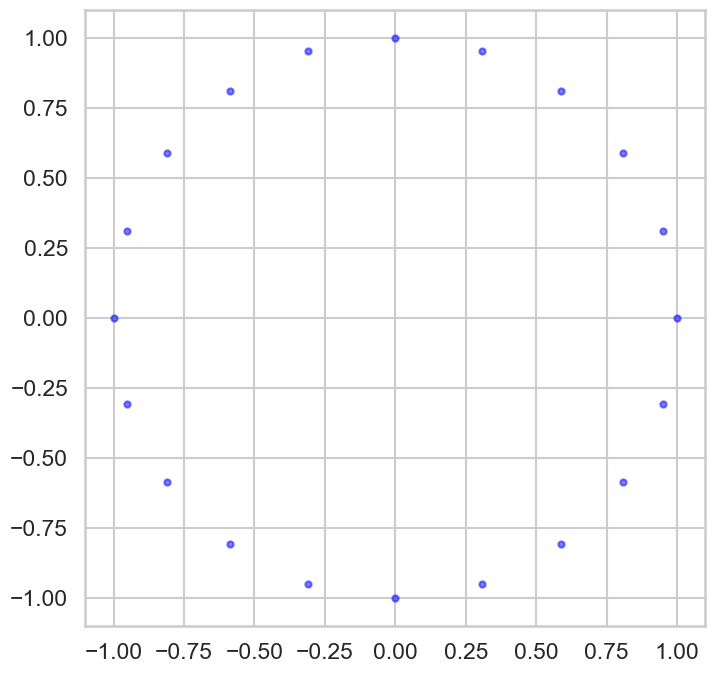

In [84]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

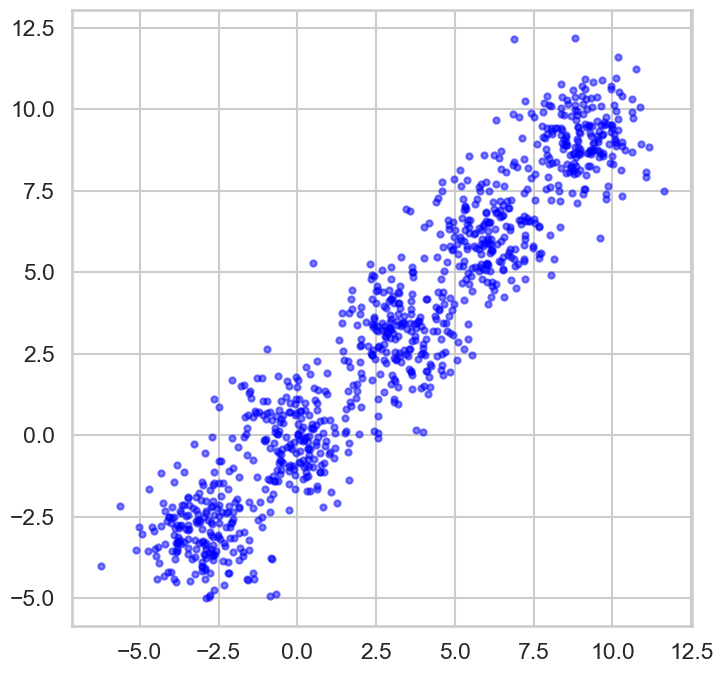

In [85]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

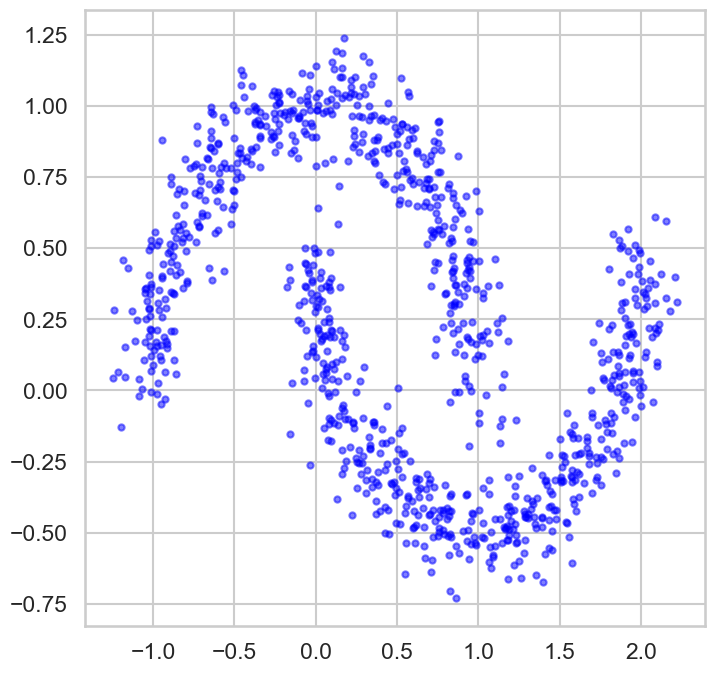

In [86]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps

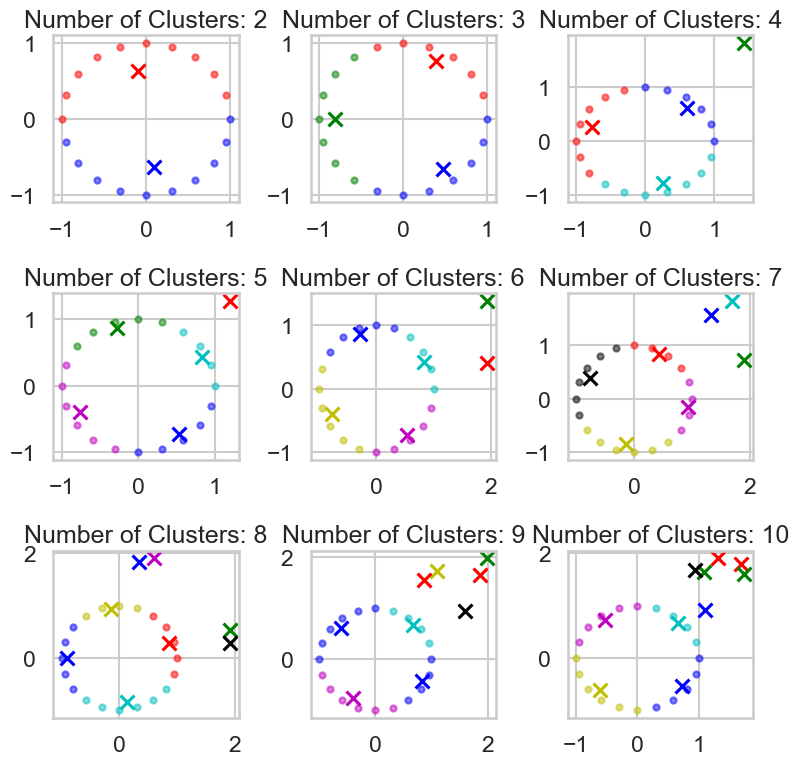

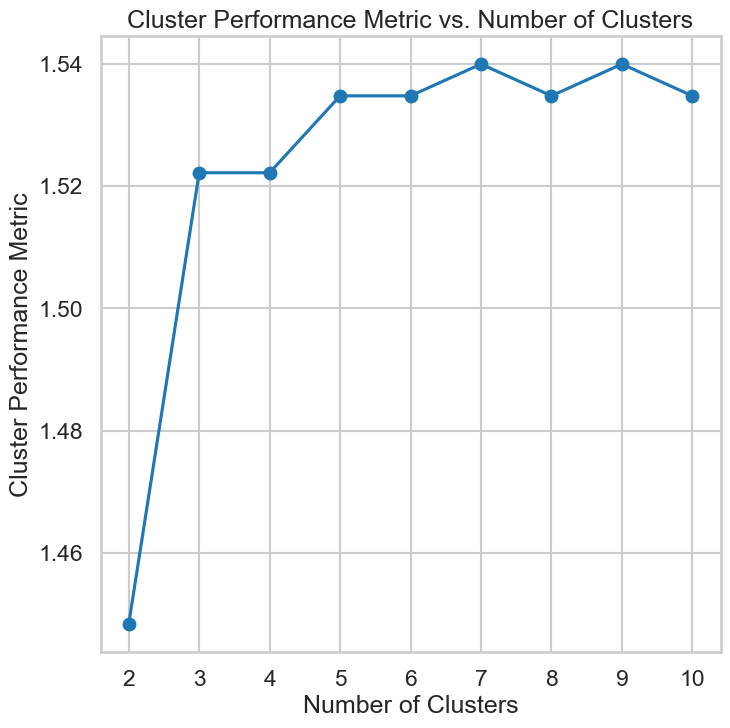

In [87]:
# Example 1
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")
sns.set_context("talk")

angle = np.linspace(0, 2 * np.pi, 20, endpoint=False)
X = np.append([np.cos(angle)], [np.sin(angle)], 0).transpose()

num_clusters = range(2, 11)
cluster_metrics = []

for k in num_clusters:
    cluster_heads, cluster_assignments, _, cluster_metric = GUC_Kmean(X, k, 'euclidean')
    cluster_metrics.append(cluster_metric)

    plt.subplot(3, 3, k-1)
    display_cluster(X, cluster_assignments, cluster_heads)
    plt.title('Number of Clusters: {}'.format(k))

plt.tight_layout()
plt.show()

plt.plot(num_clusters, cluster_metrics, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.title('Cluster Performance Metric vs. Number of Clusters')
plt.show()

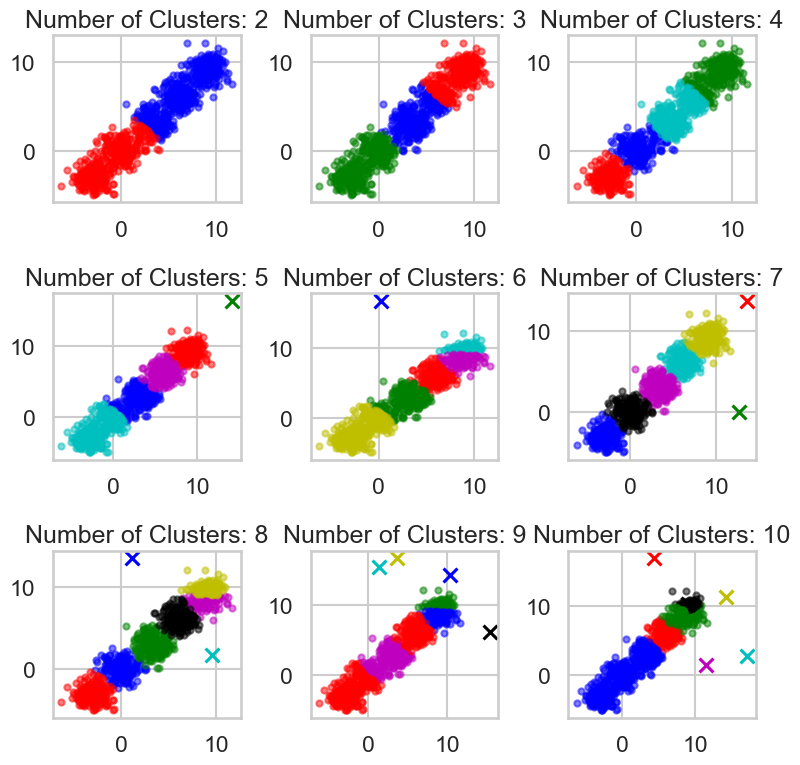

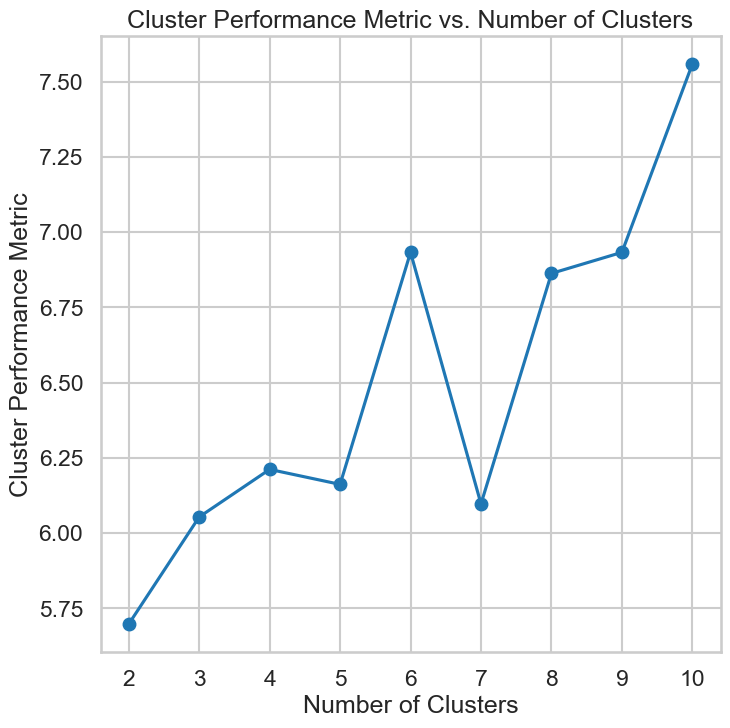

In [88]:
# Example 2
n_samples = 1000
n_bins = 4
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9, 9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

num_clusters = range(2, 11)
cluster_metrics = []

for k in num_clusters:
    cluster_heads, cluster_assignments, _, cluster_metric = GUC_Kmean(X, k, 'euclidean')
    cluster_metrics.append(cluster_metric)

    plt.subplot(3, 3, k-1)
    display_cluster(X, cluster_assignments, cluster_heads)
    plt.title('Number of Clusters: {}'.format(k))

plt.tight_layout()
plt.show()

plt.plot(num_clusters, cluster_metrics, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.title('Cluster Performance Metric vs. Number of Clusters')
plt.show()


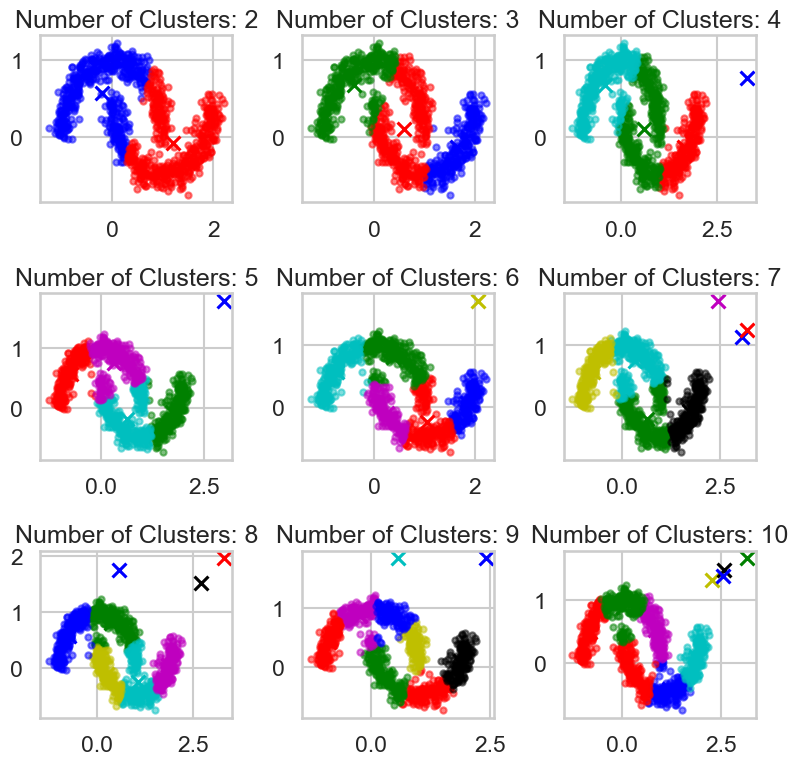

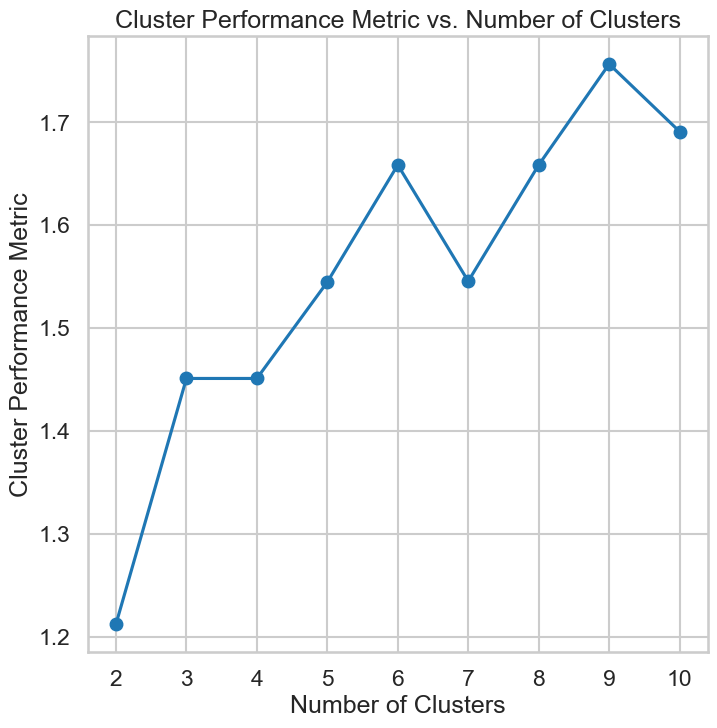

In [89]:
# Example 3
n_samples = 1000
X, y = make_moons(n_samples=n_samples, noise=0.1)

num_clusters = range(2, 11)
cluster_metrics = []

for k in num_clusters:
    cluster_heads, cluster_assignments, _, cluster_metric = GUC_Kmean(X, k, 'euclidean')
    cluster_metrics.append(cluster_metric)

    plt.subplot(3, 3, k-1)
    display_cluster(X, cluster_assignments, cluster_heads)
    plt.title('Number of Clusters: {}'.format(k))

plt.tight_layout()
plt.show()

plt.plot(num_clusters, cluster_metrics, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.title('Cluster Performance Metric vs. Number of Clusters')
plt.show()

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [90]:
data = pd.read_csv("C:/Users/Adham/Desktop/Customer data.csv")
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [113]:
model = GUC_Kmean(n_clusters = 4,init='k-means++',max_iter=500,random_state=42)
model.fit(X1)
labels = model.labels_
centroids = model.cluster_centers_
y_kmeans = model.fit_predict(X1)

plt.figure(figsize=(20,10))
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X1[y_kmeans == 4, 0], X1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of Customers - Age X Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

TypeError: GUC_Kmean() got an unexpected keyword argument 'n_clusters'